## Gradient

In [ ]:
import torch
import numpy as np

In [ ]:
x = torch.tensor(2.0, requires_grad = True)

In [ ]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x+1

In [ ]:
y

In [ ]:
y.backward()

In [ ]:
x.grad

In [ ]:
x = torch.tensor([[1.,2.,3.], [3.,2.,1.]], requires_grad = True) 

In [ ]:
x

In [ ]:
y = 3*x + 2

In [ ]:
y

In [ ]:
z = 2*y**2

In [ ]:
z

In [ ]:
out = z.mean()

In [ ]:
out

In [ ]:
out.backward(retain_graph=True)

In [ ]:
x.grad

## Linear Regression

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import torch.nn as nn

In [3]:
x_plot = np.linspace(1,50,50).reshape(-1,1)

In [46]:
x = torch.linspace(1,50,50).reshape(-1,1)

In [6]:
x

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [7]:
torch.manual_seed(71)
e = torch.randint(-8, 9, (50,1), dtype=torch.float)
e_plot = np.random.randint(-8, 9, (50,1))

In [8]:
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [9]:
y = 2*x + 1 + e
y_plot = 2*x_plot + 1 +e_plot

In [10]:
y.shape

torch.Size([50, 1])

In [11]:
y

tensor([[ 5.],
        [12.],
        [ 9.],
        [15.],
        [13.],
        [ 9.],
        [17.],
        [12.],
        [23.],
        [22.],
        [25.],
        [28.],
        [28.],
        [21.],
        [36.],
        [38.],
        [29.],
        [37.],
        [32.],
        [33.],
        [40.],
        [44.],
        [49.],
        [43.],
        [48.],
        [56.],
        [57.],
        [60.],
        [63.],
        [66.],
        [64.],
        [72.],
        [73.],
        [68.],
        [65.],
        [68.],
        [72.],
        [84.],
        [79.],
        [89.],
        [82.],
        [83.],
        [89.],
        [81.],
        [90.],
        [99.],
        [87.],
        [94.],
        [92.],
        [99.]])

In [12]:
torch.manual_seed(59)
model = nn.Linear(in_features=1, out_features=1)

print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [30]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
        # Linear es de que tipo de layer tiene
        # en este caso es una de tipo linar, puede ser convolucional ,etc
        # se le pasa el la cantidad de atributos con los que los que alimantaras
        # y la cantidad de outputs que tendra

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [31]:
torch.manual_seed(59)

model = Model(1,1)

print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [32]:
for name, param in model.named_parameters():
    print(name,'\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [33]:
x_ejem  = torch.tensor([2.0])
print(model.forward(x_ejem))

tensor([1.1758], grad_fn=<ViewBackward0>)


In [34]:
x1 = np.linspace(0.0, 50.0, 50)

In [35]:
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [36]:
w1 = 0.1059
b1 = 0.9637

y1 = w1 * x1 + b1

In [37]:
print(y1)

[0.9637     1.07176122 1.17982245 1.28788367 1.3959449  1.50400612
 1.61206735 1.72012857 1.8281898  1.93625102 2.04431224 2.15237347
 2.26043469 2.36849592 2.47655714 2.58461837 2.69267959 2.80074082
 2.90880204 3.01686327 3.12492449 3.23298571 3.34104694 3.44910816
 3.55716939 3.66523061 3.77329184 3.88135306 3.98941429 4.09747551
 4.20553673 4.31359796 4.42165918 4.52972041 4.63778163 4.74584286
 4.85390408 4.96196531 5.07002653 5.17808776 5.28614898 5.3942102
 5.50227143 5.61033265 5.71839388 5.8264551  5.93451633 6.04257755
 6.15063878 6.2587    ]


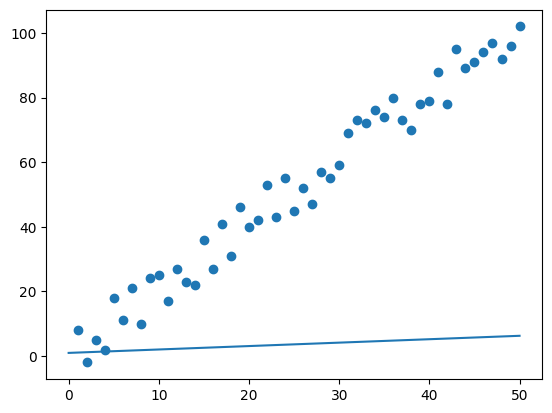

In [38]:
plt.scatter(x_plot, y_plot)
plt.plot(x1, y1)

In [39]:
criterion = nn.MSELoss()

In [40]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)

In [55]:
epochs = 50
losses = []
for i in range(epochs):
    i = i + 1
    # Prediccion
    y_pred = model.forward(x)
    
    # Calculo de la perdida
    loss = criterion(y_pred, y)

    # Agregar predida
    losses.append(loss)

    print(f"epoch {i} loss : {loss.item()} weight: { model.linear.weight.item()} bias : {model.linear.bias.item()} \n")

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    

epoch 1 loss : 21.058000564575195 weight: 1.9838191270828247 bias : 1.0557515621185303 

epoch 2 loss : 21.0574893951416 weight: 1.9837985038757324 bias : 1.0564652681350708 

epoch 3 loss : 21.056978225708008 weight: 1.9837766885757446 bias : 1.0571786165237427 

epoch 4 loss : 21.056468963623047 weight: 1.9837559461593628 bias : 1.057891607284546 

epoch 5 loss : 21.055959701538086 weight: 1.9837344884872437 bias : 1.0586042404174805 

epoch 6 loss : 21.055458068847656 weight: 1.9837136268615723 bias : 1.0593165159225464 

epoch 7 loss : 21.054950714111328 weight: 1.9836921691894531 bias : 1.0600284337997437 

epoch 8 loss : 21.054443359375 weight: 1.9836713075637817 bias : 1.0607401132583618 

epoch 9 loss : 21.053936004638672 weight: 1.9836499691009521 bias : 1.0614514350891113 

epoch 10 loss : 21.053434371948242 weight: 1.9836288690567017 bias : 1.0621623992919922 

epoch 11 loss : 21.05292510986328 weight: 1.9836077690124512 bias : 1.0628730058670044 

epoch 12 loss : 21.0524215

In [48]:
print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[1.9838]], requires_grad=True)
Parameter containing:
tensor([1.0558], requires_grad=True)


In [56]:
losses

[tensor(21.0580, grad_fn=<MseLossBackward0>),
 tensor(21.0575, grad_fn=<MseLossBackward0>),
 tensor(21.0570, grad_fn=<MseLossBackward0>),
 tensor(21.0565, grad_fn=<MseLossBackward0>),
 tensor(21.0560, grad_fn=<MseLossBackward0>),
 tensor(21.0555, grad_fn=<MseLossBackward0>),
 tensor(21.0550, grad_fn=<MseLossBackward0>),
 tensor(21.0544, grad_fn=<MseLossBackward0>),
 tensor(21.0539, grad_fn=<MseLossBackward0>),
 tensor(21.0534, grad_fn=<MseLossBackward0>),
 tensor(21.0529, grad_fn=<MseLossBackward0>),
 tensor(21.0524, grad_fn=<MseLossBackward0>),
 tensor(21.0519, grad_fn=<MseLossBackward0>),
 tensor(21.0514, grad_fn=<MseLossBackward0>),
 tensor(21.0509, grad_fn=<MseLossBackward0>),
 tensor(21.0504, grad_fn=<MseLossBackward0>),
 tensor(21.0499, grad_fn=<MseLossBackward0>),
 tensor(21.0494, grad_fn=<MseLossBackward0>),
 tensor(21.0489, grad_fn=<MseLossBackward0>),
 tensor(21.0484, grad_fn=<MseLossBackward0>),
 tensor(21.0479, grad_fn=<MseLossBackward0>),
 tensor(21.0474, grad_fn=<MseLossB

In [ ]:

epochs = 50
ep = np.array(range(epochs))

plt.plot(ep,losses)
plt.ylabel('MSE LOSS')
plt.xlabel('Epoch loss')

In [ ]:
x = np.linspace(0.0, 50.0, 50)
current_weight = model.linear.weight
current_bias = model.linear.bias

predicted_y = current_weight*x + current_bias

NameError: name 'df' is not defined